In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_curve, auc
from sklearn.calibration import calibration_curve

#modeling
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [2]:
listings2019 = pd.read_csv("C:\\Users\\vaide\\Documents\\575\\Group_Project\\Data\\Data\\listings_2019.csv.gz")
listings2018 = pd.read_csv("C:\\Users\\vaide\\Documents\\575\\Group_Project\\Data\\Data\\listings_2018.csv.gz")
listings2017 = pd.read_csv("C:\\Users\\vaide\\Documents\\575\\Group_Project\\Data\\Data\\listings_2017.csv.gz")


In [3]:
listing_review_scores_train = pd.read_csv("C:\\Users\\vaide\\Documents\\575\\Group_Project\\review_scores_all_listings.csv")
listing_avail_days_train = pd.read_csv("C:\\Users\\vaide\\Documents\\575\\Group_Project\\days_avail.csv")
listing_review_scores_test = pd.read_csv("C:\\Users\\vaide\\Documents\\575\\Group_Project\\reviews_19.csv")
listing_avail_days_test = pd.read_csv("C:\\Users\\vaide\\Documents\\575\\Group_Project\\days_avail19.csv")

In [4]:
listings2017_df=listings2017[['id','host_id',
'host_since',
'host_location',
'host_response_time',
'host_response_rate',
'host_is_superhost',
'host_has_profile_pic',
'host_identity_verified',
'street',
'neighbourhood_cleansed',
'city',
'zipcode',
'is_location_exact',
'property_type',
'room_type',
'accommodates',
'bathrooms',
'bedrooms',
'beds',
'amenities',
'price',
'guests_included',
'extra_people',
'number_of_reviews',
'has_availability',
'availability_30',
'cancellation_policy',
'instant_bookable',
'review_scores_rating',
'review_scores_location',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_value',
'review_scores_checkin',
'review_scores_communication',
'requires_license',
'require_guest_profile_picture',
'require_guest_phone_verification',
'calculated_host_listings_count',
'reviews_per_month']]

In [5]:
listings2018_df=listings2018[['id','host_id',
'host_since',
'host_location',
'host_response_time',
'host_response_rate',
'host_is_superhost',
'host_has_profile_pic',
'host_identity_verified',
'street',
'neighbourhood_cleansed',
'city',
'zipcode',
'is_location_exact',
'property_type',
'room_type',
'accommodates',
'bathrooms',
'bedrooms',
'beds',
'amenities',
'price',
'guests_included',
'extra_people',
'number_of_reviews',
'has_availability',
'availability_30',
'cancellation_policy',
'instant_bookable',
'review_scores_rating',
'review_scores_location',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_value',
'review_scores_checkin',
'review_scores_communication',
'requires_license',
'require_guest_profile_picture',
'require_guest_phone_verification',
'calculated_host_listings_count',
'reviews_per_month']]

In [6]:
listings2019_df=listings2019[['id','host_id',
'host_since',
'host_location',
'host_response_time',
'host_response_rate',
'host_is_superhost',
'host_has_profile_pic',
'host_identity_verified',
'street',
'neighbourhood_cleansed',
'city',
'zipcode',
'is_location_exact',
'property_type',
'room_type',
'accommodates',
'bathrooms',
'bedrooms',
'beds',
'amenities',
'price',
'guests_included',
'extra_people',
'number_of_reviews',
'has_availability',
'availability_30',
'cancellation_policy',
'instant_bookable',
'review_scores_rating',
'review_scores_location',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_value',
'review_scores_checkin',
'review_scores_communication',
'requires_license',
'require_guest_profile_picture',
'require_guest_phone_verification',
'calculated_host_listings_count',
'reviews_per_month']]

<Figure size 1440x720 with 0 Axes>

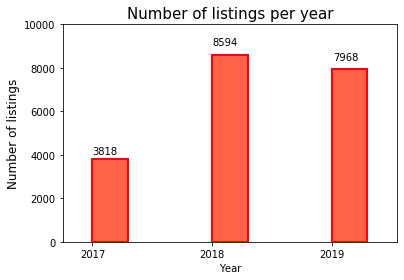

In [7]:

listings_year=pd.DataFrame(columns=["Year", "Listings"])
listings_year["Year"]=[2017,2018,2019]
listings_year["Listings"]=[3818,8594,7968]
y=listings_year["Listings"]
# listings_year[2018]=[8594]
# listings_year[2019]=[7968]

listings_year
fig=plt.gcf()
fig.set_size_inches(20,10)
ax=listings_year.plot(kind='bar', align='edge', x="Year", y="Listings", color = 'tomato',edgecolor='r', linewidth ='2', width = 0.3)
plt.ylabel("Number of listings", fontsize = 12)
plt.title("Number of listings per year", fontsize = 15)
plt.xticks(rotation=360, multialignment ='center')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.05))
plt.ylim(0,10000)
ax.get_legend().remove()

<Figure size 1440x720 with 0 Axes>

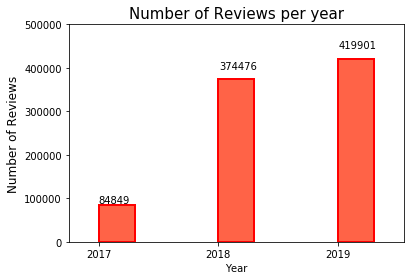

In [8]:
reviews_year=pd.DataFrame(columns=["Year", "Reviews"])
reviews_year["Year"]=[2017,2018,2019]
reviews_year["Reviews"]=[84849,374476,419901]
y=reviews_year["Reviews"]

reviews_year
fig=plt.gcf()
fig.set_size_inches(20,10)
ax=reviews_year.plot(kind='bar', align='edge', x="Year", y="Reviews", color = 'tomato',edgecolor='r', linewidth ='2', width = 0.3)
plt.ylabel("Number of Reviews", fontsize = 12)
plt.title("Number of Reviews per year", fontsize = 15)
plt.xticks(rotation=360, multialignment ='center')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.06))
plt.ylim(0,500000)
ax.get_legend().remove()

In [9]:
set_19 = set(listings2019_df.id)
set_18 = set(listings2018_df.id)
set_17 = set(listings2017_df.id)

listings2018_df['drop_out'] = listings2018_df['id'].apply(lambda x: 0 if x in set_19 else 1)
listings2017_df['drop_out'] = listings2017_df['id'].apply(lambda x: 0 if x in set_18 else 1)

In [10]:
listings_17_18=pd.concat([listings2017_df,listings2018_df], axis=0)
listings_17_18.shape

(12412, 42)

In [11]:
cols = ['host_is_superhost',
        'host_has_profile_pic', 
        'host_identity_verified',
       'is_location_exact', 'has_availability', 'instant_bookable','require_guest_profile_picture','require_guest_phone_verification','requires_license' ]

listings2019_df[cols] = (listings2019_df[cols].applymap(lambda x: 1 if x == 't' else 0))
listings_17_18[cols] = (listings_17_18[cols].applymap(lambda x: 1 if x == 't' else 0))

In [12]:
listings_17_18["host_response_time"]=listings_17_18.loc[:, ['host_response_time']].fillna("Missing")
listings2019_df["host_response_time"]=listings2019_df.loc[:, ['host_response_time']].fillna("Missing")

In [13]:
listings_17_18=listings_17_18.dropna(axis=0,subset=["host_since","host_location", "accommodates","bathrooms","bedrooms","beds","property_type"])
listings2019_df=listings2019_df.dropna(axis=0,subset=["host_since","host_location", "accommodates","bathrooms","bedrooms","beds","property_type"])
listings_17_18.shape

(12352, 42)

In [14]:
listings_17_18['host_response_rate']=listings_17_18.loc[:, ['host_response_rate']].fillna(999)
listings2019_df['host_response_rate']=listings2019_df.loc[:, ['host_response_rate']].fillna(999)
listings_17_18.shape

(12352, 42)

In [15]:
listings_17_18.price = listings_17_18.price.replace('[\$\,]', '', regex=True).astype(float)
listings_17_18=listings_17_18[listings_17_18.price>0]
listings_17_18.shape

(12348, 42)

In [16]:
listings2019_df.price = listings2019_df.price.replace('[\$\,]', '', regex=True).astype(float)
listings2019_df=listings2019_df[listings2019_df.price>0]
listings2019_df.shape

(7884, 41)

In [17]:
cols=["review_scores_location","review_scores_accuracy","review_scores_cleanliness","review_scores_value","review_scores_checkin","review_scores_communication","reviews_per_month","review_scores_rating"]

for i in cols:
    listings_17_18[i]=listings_17_18.loc[:, [i]].fillna(0)
    listings2019_df[i]=listings2019_df.loc[:, [i]].fillna(0)
listings_17_18.shape

(12348, 42)

In [18]:
listings_17_18=listings_17_18[listings_17_18.guests_included>0]
listings2019_df=listings2019_df[listings2019_df.guests_included>0]
listings_17_18.shape

(12256, 42)

In [19]:
listings_17_18=listings_17_18.dropna(axis=0,subset=["zipcode"])
listings2019_df=listings2019_df.dropna(axis=0,subset=["zipcode"])
listings_17_18['zipcode_cleansed'] = listings_17_18['zipcode'].astype('str').str[:5]
listings2019_df['zipcode_cleansed'] = listings2019_df['zipcode'].astype('str').str[:5]

In [20]:
listings_17_18=listings_17_18[listings_17_18.zipcode_cleansed!='99\n98']
listings2019_df=listings2019_df[(listings2019_df.zipcode_cleansed!='99\n98')]
listings2019_df=listings2019_df[(listings2019_df.zipcode_cleansed!=' ')]
listings2019_df.shape

(7725, 42)

In [21]:
##strings to float
###dollars
cols = ['extra_people']

listings_17_18[cols] = (listings_17_18[cols].replace({'\$': '', ',': ''}, regex=True).astype(float))
listings2019_df[cols] = (listings2019_df[cols].replace({'\$': '', ',': ''}, regex=True).astype(float))

In [22]:
###percents
listings_17_18['host_response_rate'] = (listings_17_18['host_response_rate']
                                  .replace({'%': ''}, regex=True)
                                  .astype(float))

In [23]:
###percents
listings2019_df['host_response_rate'] = (listings2019_df['host_response_rate']
                                  .replace({'%': ''}, regex=True)
                                  .astype(float))

In [24]:
listings_17_18.shape

(12189, 43)

Text(0.5, 1.0, 'Listings dropped out year to year')

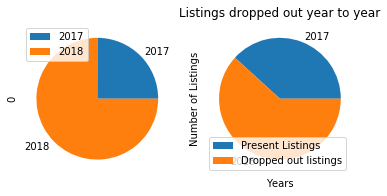

In [25]:
sum_17 = listings2017_df.drop_out.value_counts(dropna = False)
sum_18 = listings2018_df.drop_out.value_counts(dropna = False)

#sum_17.drop_out = sum_17.drop_out / 
sum_17 = sum_17.to_frame()
sum_17['year'] = 2017
sum_18 = sum_18.to_frame()
sum_18['year'] = 2018

sums = pd.concat([sum_17, sum_18])
sums = sums.reset_index()
sums.columns = ['drop_out', 'listings', 'year']
pal_dropout = ['#4878d0','#ee854a']
ax = sums.pivot('year', 'drop_out')['listings'].plot(kind='pie',  subplots = True)
plt.legend(labels=["Present Listings","Dropped out listings"])
plt.ylabel("Number of Listings")
plt.xlabel("Years")
plt.title("Listings dropped out year to year")

In [26]:
sum_17.drop_out

1    2072
0    1746
Name: drop_out, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

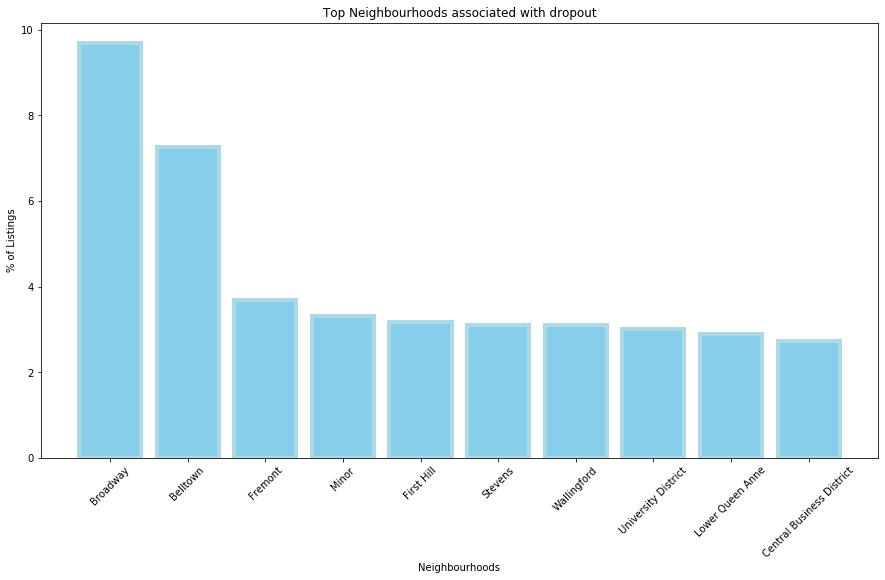

In [27]:
fig=plt.gcf()
fig.set_size_inches(15,8)
drop_nh=listings_17_18[listings_17_18.drop_out==1]
a=pd.DataFrame(drop_nh.neighbourhood_cleansed.value_counts())
a=a.reset_index()
a.columns=["Neighbourhood", "dl"]
total=a.dl.sum()
a = a.astype({'dl':'int32'})
a["%_drop_out"]=round((a["dl"]/total)*100,2)
a=a.drop(columns=["dl"])
a=a.head(10)
plt.bar(a.Neighbourhood,a["%_drop_out"],color = 'skyblue',edgecolor='lightblue', linewidth ='4')
plt.ylabel("% of Listings")
plt.xlabel("Neighbourhoods")
plt.title("Top Neighbourhoods associated with dropout")
plt.xticks(rotation=45)

In [28]:
ptype=pd.DataFrame(listings_17_18.groupby("property_type").agg({"drop_out":['mean','count']}))
ptype=ptype.reset_index()
ptype.columns=["property_type","drop_out","count_lis"]
ptype=ptype[ptype.count_lis>100]

In [29]:
rtype=pd.DataFrame(listings_17_18.groupby("room_type").agg({"drop_out":['mean','count']}))
rtype=rtype.reset_index()
rtype.columns=["room_type","drop_out","count_lis"]

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

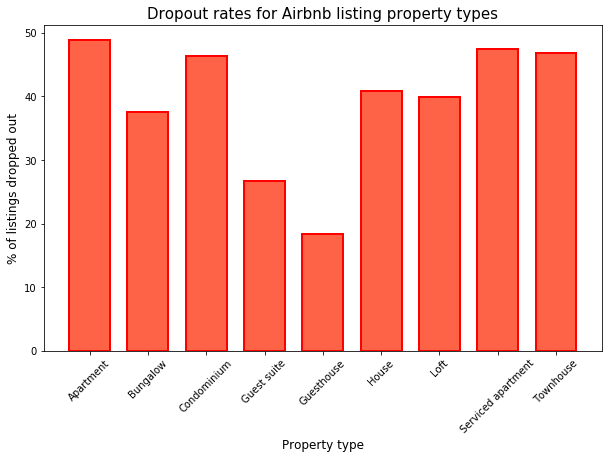

In [30]:
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.bar(ptype.property_type,round(ptype.drop_out*100,2), color = 'tomato',edgecolor='r', linewidth ='2', width = 0.7)
plt.ylabel("% of listings dropped out", fontsize = 12)
plt.xlabel("Property type", fontsize = 12)
plt.title("Dropout rates for Airbnb listing property types", fontsize = 15)
plt.xticks(rotation=45)

([0, 1, 2], <a list of 3 Text xticklabel objects>)

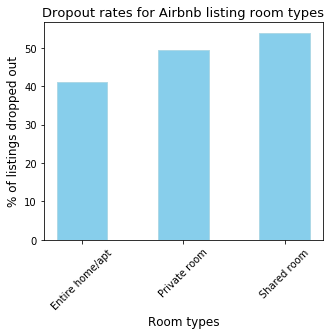

In [31]:
fig=plt.gcf()
fig.set_size_inches(5,4)
plt.bar(rtype.room_type,round(rtype.drop_out*100,2), color ='skyblue',edgecolor ='lightblue', width =0.5)
plt.ylabel("% of listings dropped out", fontsize = 12)
plt.xlabel("Room types", fontsize = 12)
plt.title("Dropout rates for Airbnb listing room types", fontsize = 13)
plt.xticks(rotation=45)

([0, 1, 2], <a list of 3 Text xticklabel objects>)

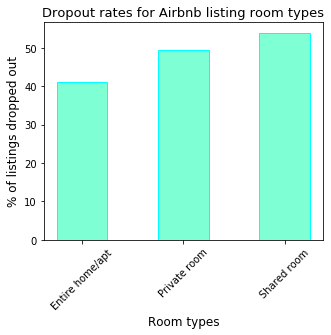

In [32]:
fig=plt.gcf()
fig.set_size_inches(5,4)
plt.bar(rtype.room_type,round(rtype.drop_out*100,2), color ='aquamarine',edgecolor ='aqua', width =0.5)
plt.ylabel("% of listings dropped out", fontsize = 12)
plt.xlabel("Room types", fontsize = 12)
plt.title("Dropout rates for Airbnb listing room types", fontsize = 13)
plt.xticks(rotation=45)

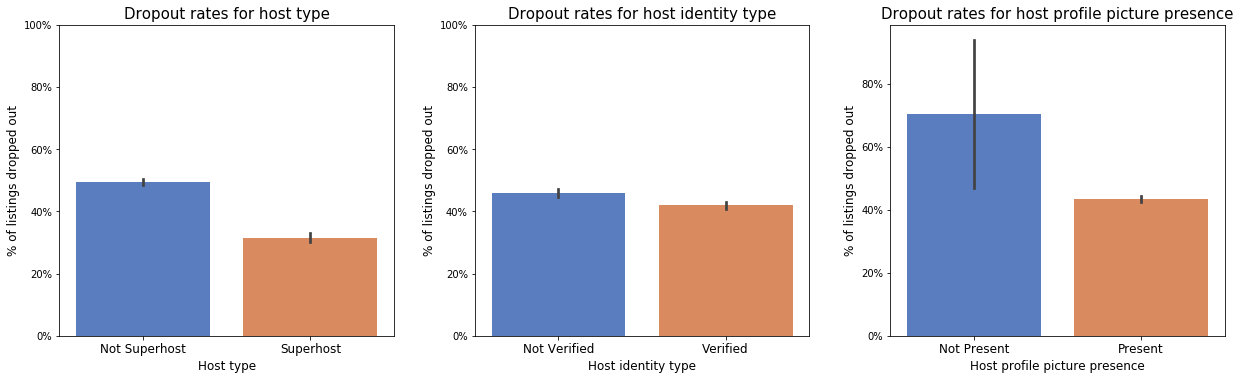

In [33]:
from  matplotlib.ticker import PercentFormatter
fig, (ax1, ax2,ax3) = plt.subplots(nrows = 1, ncols = 3,figsize=(18, 6))
fig.tight_layout(pad = 5)
ax1.set(ylim=(0, 1))
ax2.set(ylim=(0, 1))

sns.catplot(x="host_is_superhost", y="drop_out", data = listings_17_18,height=6, kind="bar", palette="muted", ax = ax1)
ax1.set_title("Dropout rates for host type", fontsize =15)
ax1.set_xlabel('Host type', fontsize =12)
ax1.set_xticklabels(['Not Superhost', 'Superhost'], fontsize =12)
ax1.set_ylabel('% of listings dropped out', fontsize =12)
ax1.yaxis.set_major_formatter(PercentFormatter(1))

sns.catplot(x="host_identity_verified", y="drop_out", data = listings_17_18, height=6, kind="bar", palette="muted", ax = ax2)
ax2.set_title("Dropout rates for host identity type", fontsize =15)
ax2.set_xlabel('Host identity type', fontsize =12)
ax2.set_xticklabels(['Not Verified', 'Verified'], fontsize =12)
ax2.set_ylabel('% of listings dropped out', fontsize =12)
ax2.yaxis.set_major_formatter(PercentFormatter(1))


sns.catplot(x="host_has_profile_pic", y="drop_out", data = listings_17_18, height=6, kind="bar", palette="muted", ax = ax3)
ax3.set_title("Dropout rates for host profile picture presence", fontsize =15)
ax3.set_xlabel('Host profile picture presence', fontsize =12)
ax3.set_xticklabels(['Not Present', 'Present'], fontsize =12)
ax3.set_ylabel('% of listings dropped out', fontsize =12)
ax3.yaxis.set_major_formatter(PercentFormatter(1))


plt.close(2)
plt.close(3)
plt.close(4)

In [34]:
#drop correlated variables
drop_cols= ['beds',
            'bedrooms',
            'review_scores_accuracy',
            'review_scores_value'
]

listings_17_18 = listings_17_18.drop(drop_cols, axis=1)

In [35]:
#convert categorical variables to dummys


##categorical columns
cat_cols = ['room_type',
            'property_type',
            'host_response_time',
            'cancellation_policy'
           ]

# cols_init = listings_17_18.columns.values
# listings_17_18 = pd.get_dummies(listings_17_18, columns = cat_cols, drop_first=True)
# cols_new = listings_17_18.columns.values
# cat_cols = list(set(cols_new).difference(set(cols_init)))

In [36]:
less = listings_17_18.drop(columns = ['amenities'])#,'drop_out','host_since','host_location','neighbourhood_cleansed','city'], axis=1)

In [37]:
#log transform skewed distributions
log_cols = [ 'price',
        'number_of_reviews',
        'review_scores_rating'
]

cont_cols_no_ln = ['host_response_rate',
             'accommodates',
             'bathrooms', 
             'guests_included', 
             'availability_30',
             'number_of_reviews',
             'review_scores_rating',
             'review_scores_cleanliness',
             'review_scores_checkin',
             'review_scores_communication',
             'review_scores_location',
             'calculated_host_listings_count',
             'reviews_per_month'
              ]

##continuous columns including log transformations
cont_cols = log_cols + cont_cols_no_ln

##binary columns
binary_cols = ['host_is_superhost',
               'host_has_profile_pic',
               'host_identity_verified',
               'is_location_exact',
               'requires_license',
               'instant_bookable',
               'require_guest_profile_picture',
               'require_guest_phone_verification',
               'has_availability'
               ]

In [38]:
listings_merged_train = pd.DataFrame()
listings_merged_train=pd.merge(listings_17_18,listing_review_scores_train, how='left', left_on=['id'], right_on=['listings_all'])
listings_merged=pd.merge(listings_merged_train,listing_avail_days_train, how='inner', left_on=['id'], right_on=['id'])

In [39]:
listings_merged_test = pd.DataFrame()
listings_merged_test=pd.merge(listings2019_df,listing_review_scores_test, how='left', left_on=['id'], right_on=['listings_all'])
listings_merged_test=pd.merge(listings_merged_test,listing_avail_days_test, how='inner', left_on=['id'], right_on=['id'])

In [40]:
listings_merged_test.isna().sum()

id                                     0
host_id                                0
host_since                             0
host_location                          0
host_response_time                     0
host_response_rate                     0
host_is_superhost                      0
host_has_profile_pic                   0
host_identity_verified                 0
street                                 0
neighbourhood_cleansed                 0
city                                   0
zipcode                                0
is_location_exact                      0
property_type                          0
room_type                              0
accommodates                           0
bathrooms                              0
bedrooms                               0
beds                                   0
amenities                              0
price                                  0
guests_included                        0
extra_people                           0
number_of_review

In [41]:
listings_merged.isna().sum()

id                                     0
host_id                                0
host_since                             0
host_location                          0
host_response_time                     0
host_response_rate                     0
host_is_superhost                      0
host_has_profile_pic                   0
host_identity_verified                 0
street                                 0
neighbourhood_cleansed                 0
city                                   0
zipcode                                0
is_location_exact                      0
property_type                          0
room_type                              0
accommodates                           0
bathrooms                              0
amenities                              0
price                                  0
guests_included                        0
extra_people                           0
number_of_reviews                      0
has_availability                       0
availability_30 

In [42]:
listings_merged_train = listings_merged_train.drop(columns ="listings_all")
listings_merged_test = listings_merged_test.drop(columns ="listings_all")

In [43]:
cols=["neg_all","neu_all","pos_all","compound_all"]

for i in cols:
    listings_merged_train[i]=listings_merged_train.loc[:, [i]].fillna(0)
    listings_merged_test[i]=listings_merged_test.loc[:, [i]].fillna(0)


In [44]:
listings_merged.shape

(12189, 45)

In [45]:
##categorical columns
cat_cols = ['room_type',
            'property_type',
            'host_response_time',
            'cancellation_policy'
           ]
X_data = pd.DataFrame(listings_17_18[cont_cols+binary_cols+cat_cols])


cols_init = X_data.columns.values
X_data = pd.get_dummies(X_data, columns = cat_cols, drop_first=True)
cols_new = X_data.columns.values
cat_cols = list(set(cols_new).difference(set(cols_init)))

In [46]:
#split data into test, train sets
y = less['drop_out']
X = X_data
#X = listings_17_18.drop('drop_out', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

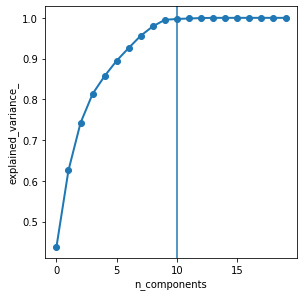

In [47]:
#based on PCA, use 10 dimensions
decomp = PCA()

std = StandardScaler()
decomp.fit(std.fit_transform(X_train[cont_cols]))

plt.figure(1, figsize=(5, 5))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(np.cumsum(decomp.explained_variance_ratio_), linewidth=2, marker = 'o')
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
plt.axvline(x=10)

In [48]:
###### Using GradientBoosting
grad_boost_clf = GradientBoostingClassifier( learning_rate = 0.05, n_estimators= 750,max_depth=6, min_samples_split=3, min_samples_leaf=40, subsample=1,max_features='sqrt',random_state=5).fit(X_train,y_train)
grad_boost_yhat = grad_boost_clf.predict(X_test)
prediction_gb=  confusion_matrix(y_test, grad_boost_yhat)
prediction_gb_df = pd.DataFrame(prediction_gb)

class_report_gb = classification_report(y_test, grad_boost_yhat, output_dict=True)
print('The Accuracy Score for Gradient Boosting: ', round(accuracy_score(y_test, grad_boost_yhat)*100,2),"%")
print('\nThe classification report for Gradient Boosting: ')
pd.DataFrame(class_report_gb).transpose()
#confusion_matrix(y_test, grad_boost_yhat)

The Accuracy Score for Gradient Boosting:  69.44 %

The classification report for Gradient Boosting: 


,precision,recall,f1-score,support
0,0.714473,0.779286,0.745473,1400.000000
1,0.660812,0.579961,0.617753,1038.000000
accuracy,0.694422,0.694422,0.694422,0.694422
macro avg,0.687643,0.679624,0.681613,2438.000000
weighted avg,0.691626,0.694422,0.691095,2438.000000


In [49]:
#random.seed(1)
nb_clf = SVC()
nb_model=nb_clf.fit(X_train, y_train)
nb_yhat = nb_model.predict(X_test)
prediction_nb=  confusion_matrix(y_test, nb_yhat)
prediction_nb_df = pd.DataFrame(prediction_nb)

class_report_nb = classification_report(y_test, nb_yhat, output_dict=True)
nb_acc=accuracy_score(y_test, nb_yhat)
print("The Accuracy Score for SVM Model:",round(nb_acc*100,2),"%")
print('\nThe classification report for SVM Model: ')
pd.DataFrame(class_report_nb).transpose()

The Accuracy Score for SVM Model: 58.7 %

The classification report for SVM Model: 


,precision,recall,f1-score,support
0,0.608384,0.787857,0.686586,1400.000000
1,0.524800,0.315992,0.394468,1038.000000
accuracy,0.586957,0.586957,0.586957,0.586957
macro avg,0.566592,0.551925,0.540527,2438.000000
weighted avg,0.572797,0.586957,0.562214,2438.000000


In [50]:
log_reg_mod = LogisticRegression(penalty = 'l2').fit(X_train, y_train)
log_reg_yhat = log_reg_mod.predict(X_test)

prediction_lr =confusion_matrix(y_test, log_reg_yhat)
prediction_lr_df = pd.DataFrame(prediction_lr)

class_report_lr = classification_report(y_test, log_reg_yhat, output_dict=True)

print('\nThe Accuracy Score for Regularized Logistic Regression Model:', round((accuracy_score(y_test, log_reg_yhat))*100,2),"%")
print('\nThe classification report for Regularized Logistic Regression Model: ')
pd.DataFrame(class_report_lr).transpose()


The Accuracy Score for Regularized Logistic Regression Model: 62.92 %

The classification report for Regularized Logistic Regression Model: 


,precision,recall,f1-score,support
0,0.654421,0.750714,0.699268,1400.000000
1,0.580529,0.465318,0.516578,1038.000000
accuracy,0.629204,0.629204,0.629204,0.629204
macro avg,0.617475,0.608016,0.607923,2438.000000
weighted avg,0.622961,0.629204,0.621486,2438.000000
